In [1]:
import pandas as pd
import spacy
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

In [2]:
df = pd.read_csv('../cleaned_data/top_21_businesses.csv', sep='\t')

In [3]:
ds = df.loc[df['name'] == 'Wicked Spoon'].sort_values('date', ascending=False)
reviews = ' '.join(ds.loc[ds['stars'] == 1, 'text'][:300])

In [4]:
doc = nlp(reviews)

In [68]:
text = [t.text for t in doc if t.pos_ == 'NOUN']

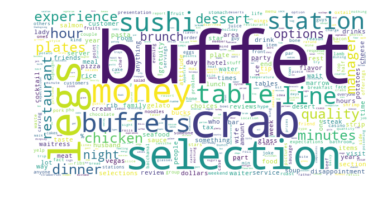

In [70]:
def getFrequencyDictForText(text):
    freq_dict = {}

    for word in text:
        if re.match("your|person|place|that|thing", word):
            continue
        val = freq_dict.get(word, 0)
        freq_dict[word.lower()] = val + 1
    return freq_dict


def makeImage(text):
    wc = WordCloud(width=600, height=300, background_color="white", max_words=2000)
    wc.generate_from_frequencies(text)
    wc.to_file('wordcloud.png')

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


makeImage(getFrequencyDictForText(text))

In [76]:
200000 / 400

500.0